## Titanic Dataset visualization

Necessary Imports

In [1]:
import numpy as np
import pandas as pd 
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Data Reading

In [2]:
gender_submission = pd.read_csv("../input/titanic/gender_submission.csv")
test = pd.read_csv("../input/titanic/test.csv")
train = pd.read_csv("../input/titanic/train.csv")

In [3]:
print('Train data contains: {} samples\nTest data contains: {} samples'.format(train.shape[0], test.shape[0]) )
#Visualizing train set
train.head()

Train data contains: 891 samples
Test data contains: 418 samples


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Statistics of data

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the basic information printed using pandas function, we can observe that the average age of the passengers on titanic was around 30 years

Brief summary regarding data

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


1. Train set contains 12 columns
2. Train set contains 3 data types i.e. float, int, object
3. Train set contains null columns

## Missing values

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, embarked and cabin column has missing values in training set

In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Age and cabin has missing values in testing set.

## Treating Missing Values

Missing Values in the column Age can be fixed by imputing values, in our case, using average, of this column. 
For the column Embarked the missing values can be fixed by 'ffil' that implaces last valid observation in this column. At the same time, I dropped PassengerId, Name and Ticket columns.

In [8]:
imputer = SimpleImputer(np.nan, "mean")
#Imputing mean of age in missing rows of age
train['Age'] = imputer.fit_transform(np.array(train['Age']).reshape(891, 1)) 
#Putting the nearest value in the missing value
train.Embarked.fillna(method='ffill', inplace=True) 
#Dropping the following columns because they aint much useful for visualization or modeling
train.drop(['PassengerId', 'Name','Ticket'], axis=1, inplace=True)
#Displaying modified dataset
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


Now for the test data:

In [9]:
test['Age'] = imputer.fit_transform(np.array(test['Age']).reshape(418, 1))
test.Embarked.fillna(method='ffill', inplace=True)
test.Fare.fillna(method='ffill', inplace=True)
test.drop(['Name', 'Ticket'], axis=1, inplace=True)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,7.8292,NaN,Q
1,893,3,female,47.0,1,0,7.0000,NaN,S
2,894,2,male,62.0,0,0,9.6875,NaN,Q
3,895,3,male,27.0,0,0,8.6625,NaN,S
4,896,3,female,22.0,1,1,12.2875,NaN,S


## Data Analysis


### Survived
Distribution of survived:<br> 1 - survived <br>
                          0 - died 

In [10]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Gender

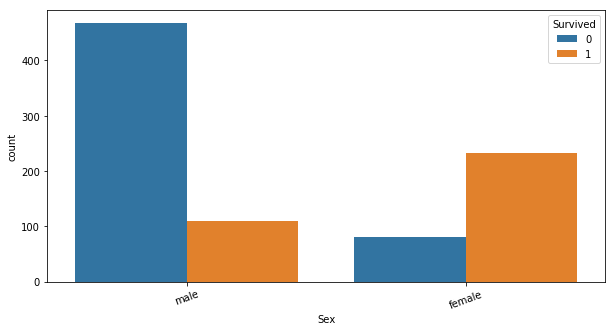

In [11]:
plt.figure(figsize=[10,5])
sns.countplot(x = 'Sex', hue = 'Survived', data = train)
plt.xticks(rotation = 20);

Above visualization shows that the survival rate of women is a lot higher than men.<br>The reason is that the women are given first priority in a rescue mission

#### Barplot of survival rate between men and women:

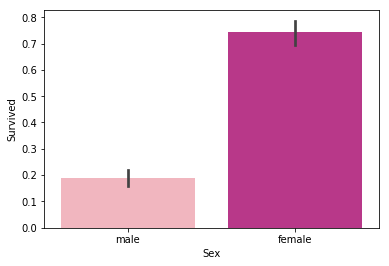

In [12]:
sns.barplot(x='Sex', y='Survived', data=train, palette=('RdPu'));

In [13]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


### Passenger Class

To look at the correlation between passenger class and survival statistics we can plot a countplot.

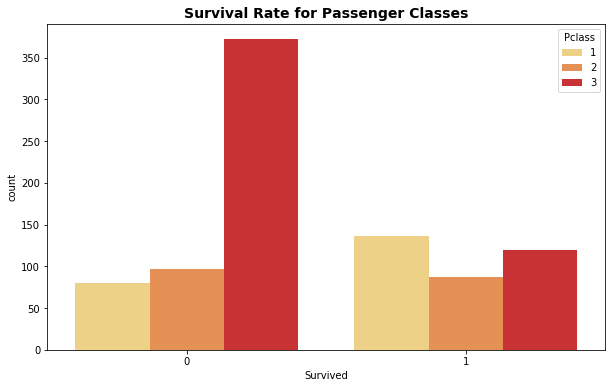

In [14]:
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.countplot(x = 'Survived', hue = 'Pclass', data = train, palette = 'YlOrRd')
ax.set_xlabel('Survived')
ax.set_title('Survival Rate for Passenger Classes', fontsize = 14, fontweight='bold');

The death rate is at peak among the 3rd class passengers considering the fact that the poor were given the lowest priority in the rescue mission<br>
The survial rate is highest among the first class members because they were given first priority.

Distribution of survivors among passenger class and gender

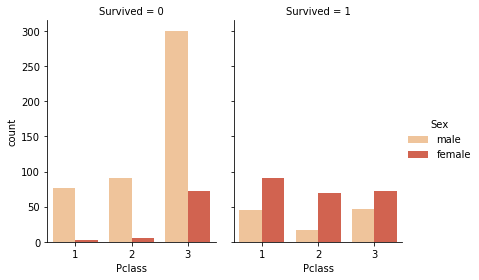

In [15]:
ax = sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data=train, kind="count",
                height=4, aspect=.7, palette = 'OrRd');

Here is another representation:

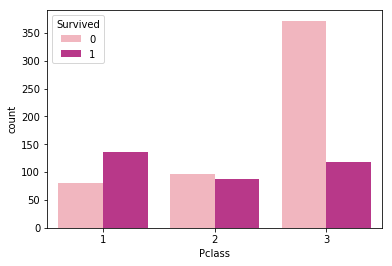

In [16]:
sns.countplot(x = "Pclass", hue = "Survived", data = train, palette = 'RdPu');

And here is the rate of survival by class:

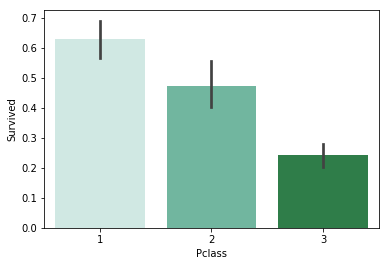

In [17]:
sns.barplot(x="Pclass", y="Survived", data= train, palette = 'BuGn');

The above graphs points to the fact that the survival rate was highest among the first class females

In [18]:
perc = train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
perc['Survived']=perc['Survived']*100
perc

,Pclass,Survived
0,1,62.962963
1,2,47.282609
2,3,24.236253


Above distribution clearly shows us the percentage of survivors among several classes

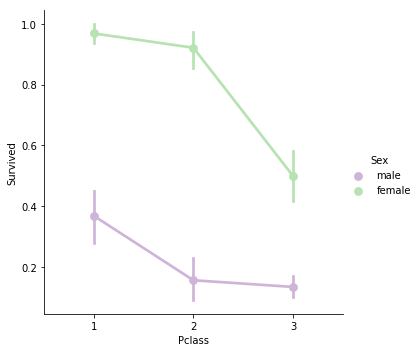

In [19]:
sns.factorplot(x='Pclass', y='Survived', hue = 'Sex', data = train, palette = 'PRGn');

## Age

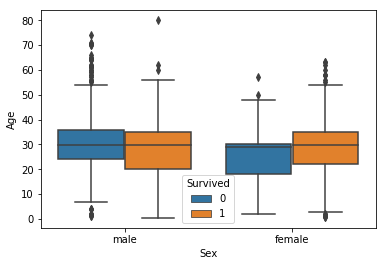

In [20]:
sns.boxplot(x='Sex', y='Age', hue = 'Survived',data=train);

Insights from the box plot:
1. Average age on titanic is 30
2. Male children less than 8 years old did not survive where as girls below 10 did survive.
3. Majority of males above 53 didnot survive the incident where as many women above 55 survived.
4. Oldest person who survived titanic crash was 80 year old male.
5. The middle age of men who couldnot survive was between 24 and 36 years old, for women between 18 and 32  

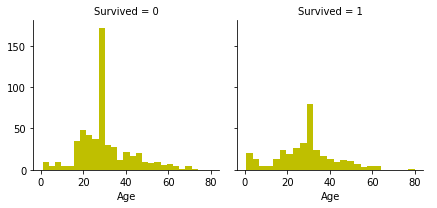

In [21]:
grid = sns.FacetGrid(train, col='Survived')
grid.map(plt.hist, 'Age', bins=25, color = 'y').add_legend();
sns.set(style="ticks", color_codes=True);

Most of the passengers are between 15 and 40 years old.

Some additional statistics for both data sets: Average and Standard Deviation.

In [22]:
avg_age_train = train ["Age"].mean()
std_age_train = train ["Age"].std()

avg_age_test = test["Age"].mean()
std_age_test = test ["Age"].std()

Creating age groups

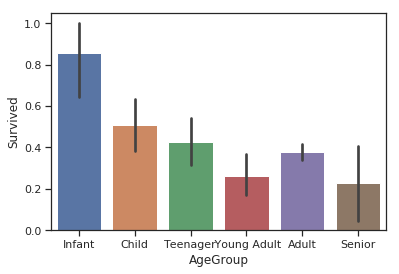

In [23]:
bins = [0, 1, 12, 18, 21,  60, np.inf]
labels = ['Infant', 'Child', 'Teenager',' Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)
sns.barplot(x="AgeGroup", y="Survived", data= train)
plt.show;

In [24]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup
0,0,3,male,22.0,1,0,7.2500,NaN,S,Adult
1,1,1,female,38.0,1,0,71.2833,C85,C,Adult
2,1,3,female,26.0,0,0,7.9250,NaN,S,Adult
3,1,1,female,35.0,1,0,53.1000,C123,S,Adult
4,0,3,male,35.0,0,0,8.0500,NaN,S,Adult


In [25]:
train[['AgeGroup', 'Survived']].groupby(['AgeGroup'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,AgeGroup,Survived
0,Infant,0.857143
1,Child,0.509091
2,Teenager,0.428571
4,Adult,0.375940
3,Young Adult,0.261538
5,Senior,0.227273


In [26]:
AgeGroup_train  = pd.get_dummies(train['AgeGroup'])
AgeGroup_train.columns = ['Infant', 'Child', 'Teenager',' Young Adult', 'Adult', 'Senior']
AgeGroup_test  = pd.get_dummies(test['AgeGroup'])
AgeGroup_test.columns = ['Infant', 'Child', 'Teenager',' Young Adult', 'Adult', 'Senior']

train = train.join(AgeGroup_train)
test = test.join(AgeGroup_test)

Instead of creating dummies like I did above, you can map values to each category. And, as you can see, these works.

In [27]:
age_mapping = {'Infant': 1, 'Child': 2, 'Teenager': 3, 'Young Adult': 4, 'Adult': 5, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup,Infant,Child,Teenager,Young Adult,Adult,Senior
0,0,3,male,22.0,1,0,7.2500,NaN,S,5.0,0,0,0,0,1,0
1,1,1,female,38.0,1,0,71.2833,C85,C,5.0,0,0,0,0,1,0
2,1,3,female,26.0,0,0,7.9250,NaN,S,5.0,0,0,0,0,1,0
3,1,1,female,35.0,1,0,53.1000,C123,S,5.0,0,0,0,0,1,0
4,0,3,male,35.0,0,0,8.0500,NaN,S,5.0,0,0,0,0,1,0


In [28]:
train.drop(['AgeGroup', 'Age'],axis=1,inplace=True)
test.drop(['AgeGroup', 'Age'],axis=1,inplace=True)
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Infant,Child,Teenager,Young Adult,Adult,Senior
0,0,3,male,1,0,7.2500,NaN,S,0,0,0,0,1,0
1,1,1,female,1,0,71.2833,C85,C,0,0,0,0,1,0
2,1,3,female,0,0,7.9250,NaN,S,0,0,0,0,1,0
3,1,1,female,1,0,53.1000,C123,S,0,0,0,0,1,0
4,0,3,male,0,0,8.0500,NaN,S,0,0,0,0,1,0


## Cabin

Converting the cabin code to integer form and ignoring the Nan rows. Nan rows points out that the passenger had no cabin

In [29]:
train["Cabin_new"] = (train["Cabin"].notnull().astype('int'))
test["Cabin_new"] = (test["Cabin"].notnull().astype('int'))
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)


% of people having Cabin survived: 66.66666666666666
% of people not having Cabin survived: 29.985443959243085


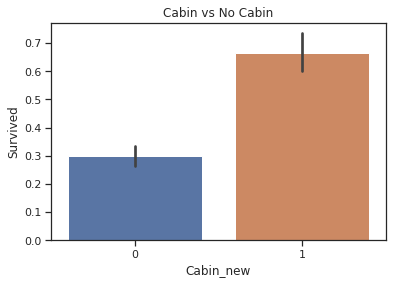

In [31]:
print("% of people having Cabin survived:", train["Survived"][train["Cabin_new"] == 1].value_counts(normalize = True)[1]*100)
print("% of people not having Cabin survived:", train["Survived"][train["Cabin_new"] == 0].value_counts(normalize = True)[1]*100)

sns.barplot(x="Cabin_new", y="Survived", data=train).set_title('Cabin vs No Cabin')
plt.show()

Passangers with the Cabin had a higher survival rate considering their elite status, they were given priority in the rescue mission

## Family Size

In [48]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [49]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


To analyse the data based on the family size, first, create new column:

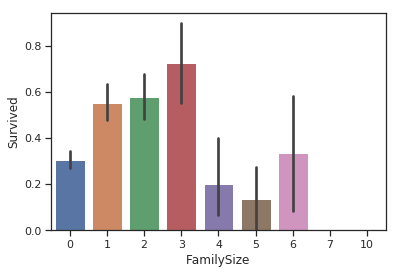

In [50]:
train['FamilySize'] = train['Parch'] + train['SibSp']
test['FamilySize'] = test['Parch'] + test['SibSp']
train.drop(['Parch', 'SibSp'], axis=1,inplace=True)
test.drop(['Parch', 'SibSp'], axis=1,inplace=True)
sns.barplot(x="FamilySize", y="Survived", data=train)
plt.show;

Family size of 3 survived the most

Another way to present it:

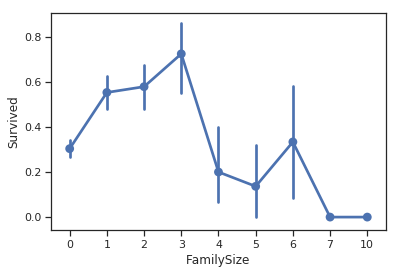

In [51]:
sns.pointplot(x='FamilySize', y = 'Survived', data = train);

Another approach to estimate survival rate on basis of family size proves the estimation too

## Port of Embarkation(From where the passengers boarded)

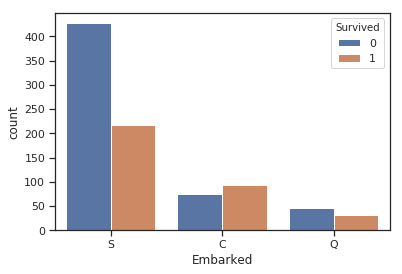

In [54]:
sns.countplot(x='Embarked', hue='Survived', data=train);

From the graph above, it is visible that, port Southampton(S) has the highest number of survivors

Label encoding the embarked column using getdummies()

In [55]:
embark_dummies_train  = pd.get_dummies(train['Embarked'])
embark_dummies_test  = pd.get_dummies(test['Embarked'])

train = train.join(embark_dummies_train)
test = test.join(embark_dummies_test)
train.head()

,Survived,Pclass,Sex,Fare,Embarked,Infant,Child,Teenager,Young Adult,Adult,Senior,Cabin_new,FamilySize,C,Q,S
0,0,3,male,7.2500,S,0,0,0,0,1,0,0,1,0,0,1
1,1,1,female,71.2833,C,0,0,0,0,1,0,1,1,1,0,0
2,1,3,female,7.9250,S,0,0,0,0,1,0,0,0,0,0,1
3,1,1,female,53.1000,S,0,0,0,0,1,0,1,1,0,0,1
4,0,3,male,8.0500,S,0,0,0,0,1,0,0,0,0,0,1


In [56]:
train = train.drop(['Embarked'], axis = 1)
test = test.drop(['Embarked'], axis = 1)
train.head()

,Survived,Pclass,Sex,Fare,Infant,Child,Teenager,Young Adult,Adult,Senior,Cabin_new,FamilySize,C,Q,S
0,0,3,male,7.2500,0,0,0,0,1,0,0,1,0,0,1
1,1,1,female,71.2833,0,0,0,0,1,0,1,1,1,0,0
2,1,3,female,7.9250,0,0,0,0,1,0,0,0,0,0,1
3,1,1,female,53.1000,0,0,0,0,1,0,1,1,0,0,1
4,0,3,male,8.0500,0,0,0,0,1,0,0,0,0,0,1


Label encoding the gender column using map()

In [57]:
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,Survived,Pclass,Sex,Fare,Infant,Child,Teenager,Young Adult,Adult,Senior,Cabin_new,FamilySize,C,Q,S
0,0,3,0,7.2500,0,0,0,0,1,0,0,1,0,0,1
1,1,1,1,71.2833,0,0,0,0,1,0,1,1,1,0,0
2,1,3,1,7.9250,0,0,0,0,1,0,0,0,0,0,1
3,1,1,1,53.1000,0,0,0,0,1,0,1,1,0,0,1
4,0,3,0,8.0500,0,0,0,0,1,0,0,0,0,0,1
